In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats

import utils
import seaborn as sns 
import seaborn.objects as so
import plotnine as pn
from sklearn.preprocessing import StandardScaler, scale
import matplotlib.pyplot as plt
from matplotlib import style 




In [2]:
import importlib
importlib.reload(utils)
savepath = 'ana_action_plan_dimentionality_report_3d'

# One dot 

In [4]:
filename = utils.Save.savepath('ana_action_plan_dimentionality', 'three_dot_dim.csv')
df_all = pd.read_csv(filename)

df_all_group = df_all.copy()
df_all_group['dim'] = 1-df_all_group['dim']
df_all_group = df_all_group.drop(['trial no.', 'accuracy', 'selected dot', 'target dot'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()

df_all_group = df_all_group.rename(columns={'actual control': 'actual_control', 'angular bias': 'angular_bias'})


df_all_group['actual_control'] = df_all_group['actual_control'].astype('category')
df_all_group['angular_bias'] = df_all_group['angular_bias'].astype('category')


In [5]:
%load_ext rpy2.ipython

In [6]:
%R -i df_all_group
%R print(df_all_group)

    group participant actual_control angular_bias       dim
0       H  K-Reg-H-10            0.3            0 0.5665394
1       H  K-Reg-H-10            0.3           90 0.6126954
2       H  K-Reg-H-10           0.55            0 0.6201767
3       H  K-Reg-H-10           0.55           90 0.6415906
4       H  K-Reg-H-10            0.8            0 0.6520808
5       H  K-Reg-H-10            0.8           90 0.6358898
6       H  K-Reg-H-11            0.3            0 0.6289274
7       H  K-Reg-H-11            0.3           90 0.6279702
8       H  K-Reg-H-11           0.55            0 0.6956712
9       H  K-Reg-H-11           0.55           90 0.6565490
10      H  K-Reg-H-11            0.8            0 0.7139392
11      H  K-Reg-H-11            0.8           90 0.6523627
12      H  K-Reg-H-12            0.3            0 0.6552198
13      H  K-Reg-H-12            0.3           90 0.6505296
14      H  K-Reg-H-12           0.55            0 0.6851163
15      H  K-Reg-H-12           0.55    

/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "actual_control". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "angular_bias". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.


     H   K-Reg-H-6            0.3            0 0.7167091
127     H   K-Reg-H-6            0.3           90 0.7054130
128     H   K-Reg-H-6           0.55            0 0.7124559
129     H   K-Reg-H-6           0.55           90 0.7139852
130     H   K-Reg-H-6            0.8            0 0.7284163
131     H   K-Reg-H-6            0.8           90 0.7024935
132     H   K-Reg-H-7            0.3            0 0.5828033
133     H   K-Reg-H-7            0.3           90 0.5966169
134     H   K-Reg-H-7           0.55            0 0.6124283
135     H   K-Reg-H-7           0.55           90 0.5701242
136     H   K-Reg-H-7            0.8            0 0.6189989
137     H   K-Reg-H-7            0.8           90 0.6193199
138     H   K-Reg-H-8            0.3            0 0.6729542
139     H   K-Reg-H-8            0.3           90 0.6629304
140     H   K-Reg-H-8           0.55            0 0.6898502
141     H   K-Reg-H-8           0.55           90 0.6666561
142     H   K-Reg-H-8            0.8       

,group,participant,actual_control,angular_bias,dim
0,H,K-Reg-H-10,0.3,0,0.566539
1,H,K-Reg-H-10,0.3,90,0.612695
2,H,K-Reg-H-10,0.55,0,0.620177
3,H,K-Reg-H-10,0.55,90,0.641591
4,H,K-Reg-H-10,0.8,0,0.652081
...,...,...,...,...,...
295,S,Reg-S-5,0.3,90,0.674974
296,S,Reg-S-5,0.55,0,0.576106
297,S,Reg-S-5,0.55,90,0.609711
298,S,Reg-S-5,0.8,0,0.642331


## Three-way anova

In [7]:
%%R
library(rstatix)
library(emmeans)
library(dplyr)
library(tidyr)
model <- anova_test(df_all_group, dv = dim, 
                    wid = participant,
                    within = c(actual_control, angular_bias),
                    between = group,
                    detailed = TRUE)

model
# anova_summary(model)
# emmeans_test(df_all_group, dim~actual_control)

# emmeans(model, ~ actual_control * angular_bias | group, adjust = "tukey")


R[write to console]: 
Attaching package: ‘rstatix’


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ANOVA Table (type II tests)

$ANOVA
                             Effect DFn DFd         SSn   SSd            F
1                       (Intercept)   1  48 1.41442e+02 1.059 6.411176e+03
2                             group   1  48 1.80000e-02 1.059 8.200000e-01
3                    actual_control   2  96 3.00000e-03 0.063 2.606000e+00
4                      angular_bias   1  48 1.47000e-09 0.025 2.840000e-06
5              group:actual_control   2  96 8.00000e-03 0.063 5.770000e+00
6                group:angular_bias   1  48 7.00000e-03 0.025 1.278300e+01
7       actual_control:angular_bias   2  96 2.00000e-03 0.034 2.942000e+00
8 group:actual_control:angular_bias   2  96 4.00000e-03 0.034 5.148000e+00
         p p<.05      ges
1 9.25e-53     * 9.92e-01
2 3.70e-01       1.50e-02
3 7.90e-02       3.00e-03
4 9.99e-01       1.25e-09
5 4.00e-03     * 6.00e-03
6 8.10e-04     * 6.00e-03
7 5.80e-02       2.00e-03
8 8.00e-03     * 3.00e-03

$`Mauchly's Test for Sphericity`
                     

## two way-simple anova

### Health group

In [8]:
%%R
model <- anova_test(df_all_group %>% group_by(group), dv = dim, 
                    wid = participant,
                    within = c(actual_control, angular_bias),
                    detailed = TRUE)

print("---------------------------------- Health ----------------------------------")
print(model[[1, 2]])



[1] "---------------------------------- Health ----------------------------------"
[[1]]
ANOVA Table (type III tests)

$ANOVA
                       Effect DFn DFd    SSn   SSd        F       p p<.05   ges
1                 (Intercept)   1  24 72.329 0.289 6016.510 2.5e-30     * 0.995
2              actual_control   2  48  0.009 0.032    6.966 2.0e-03     * 0.026
3                angular_bias   1  24  0.003 0.013    5.927 2.3e-02     * 0.009
4 actual_control:angular_bias   2  48  0.005 0.017    6.481 3.0e-03     * 0.013

$`Mauchly's Test for Sphericity`
                       Effect     W     p p<.05
1              actual_control 0.980 0.797      
2 actual_control:angular_bias 0.969 0.699      

$`Sphericity Corrections`
                       Effect   GGe      DF[GG] p[GG] p[GG]<.05   HFe
1              actual_control 0.981 1.96, 47.08 0.002         * 1.067
2 actual_control:angular_bias 0.970 1.94, 46.57 0.004         * 1.054
       DF[HF] p[HF] p[HF]<.05
1 2.13, 51.23 0.002         *

### Patient group

In [9]:
%%R
print("---------------------------------- Patient ---------------------------------")
print(model[[2, 2]])

[1] "---------------------------------- Patient ---------------------------------"
[[1]]
ANOVA Table (type III tests)

$ANOVA
                       Effect DFn DFd    SSn   SSd        F        p p<.05
1                 (Intercept)   1  24 69.131 0.770 2153.487 5.21e-25     *
2              actual_control   2  48  0.002 0.030    1.233 3.00e-01      
3                angular_bias   1  24  0.003 0.011    6.935 1.50e-02     *
4 actual_control:angular_bias   2  48  0.001 0.017    1.628 2.07e-01      
    ges
1 0.988
2 0.002
3 0.004
4 0.001

$`Mauchly's Test for Sphericity`
                       Effect     W     p p<.05
1              actual_control 0.984 0.829      
2 actual_control:angular_bias 0.963 0.649      

$`Sphericity Corrections`
                       Effect   GGe      DF[GG] p[GG] p[GG]<.05   HFe
1              actual_control 0.984 1.97, 47.24 0.300           1.071
2 actual_control:angular_bias 0.964 1.93, 46.29 0.208           1.047
       DF[HF] p[HF] p[HF]<.05
1 2.14, 51.42 

## simple main effect

# Plot

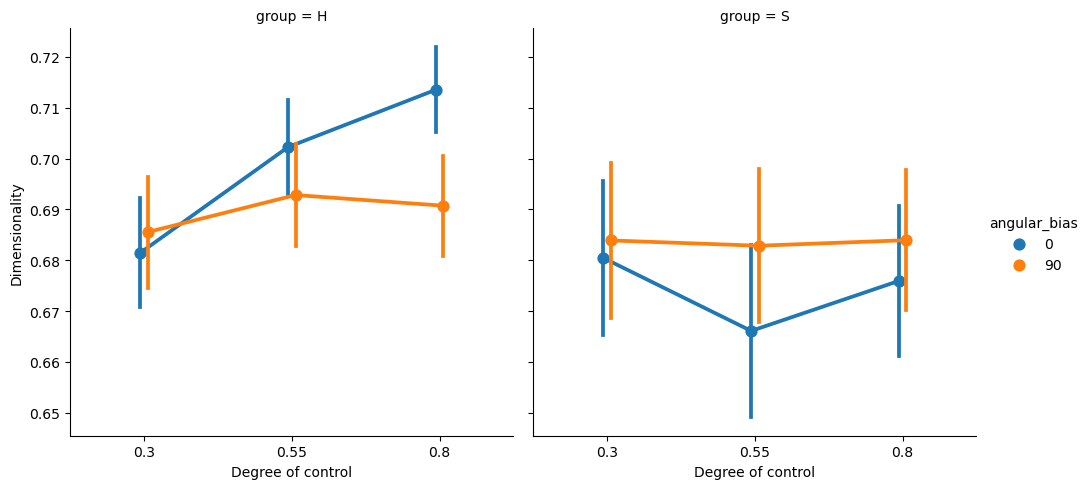

In [17]:
p = sns.catplot(x='actual_control', y='dim', hue='angular_bias', col='group', data=df_all_group, kind='point', errorbar='se', dodge=True)
p.set_axis_labels("Degree of control", "Dimensionality")


In [ ]:
filepaths = utils.Save.savepath(savepath, 'dimentionality.pdf')
p.savefig(filepaths)

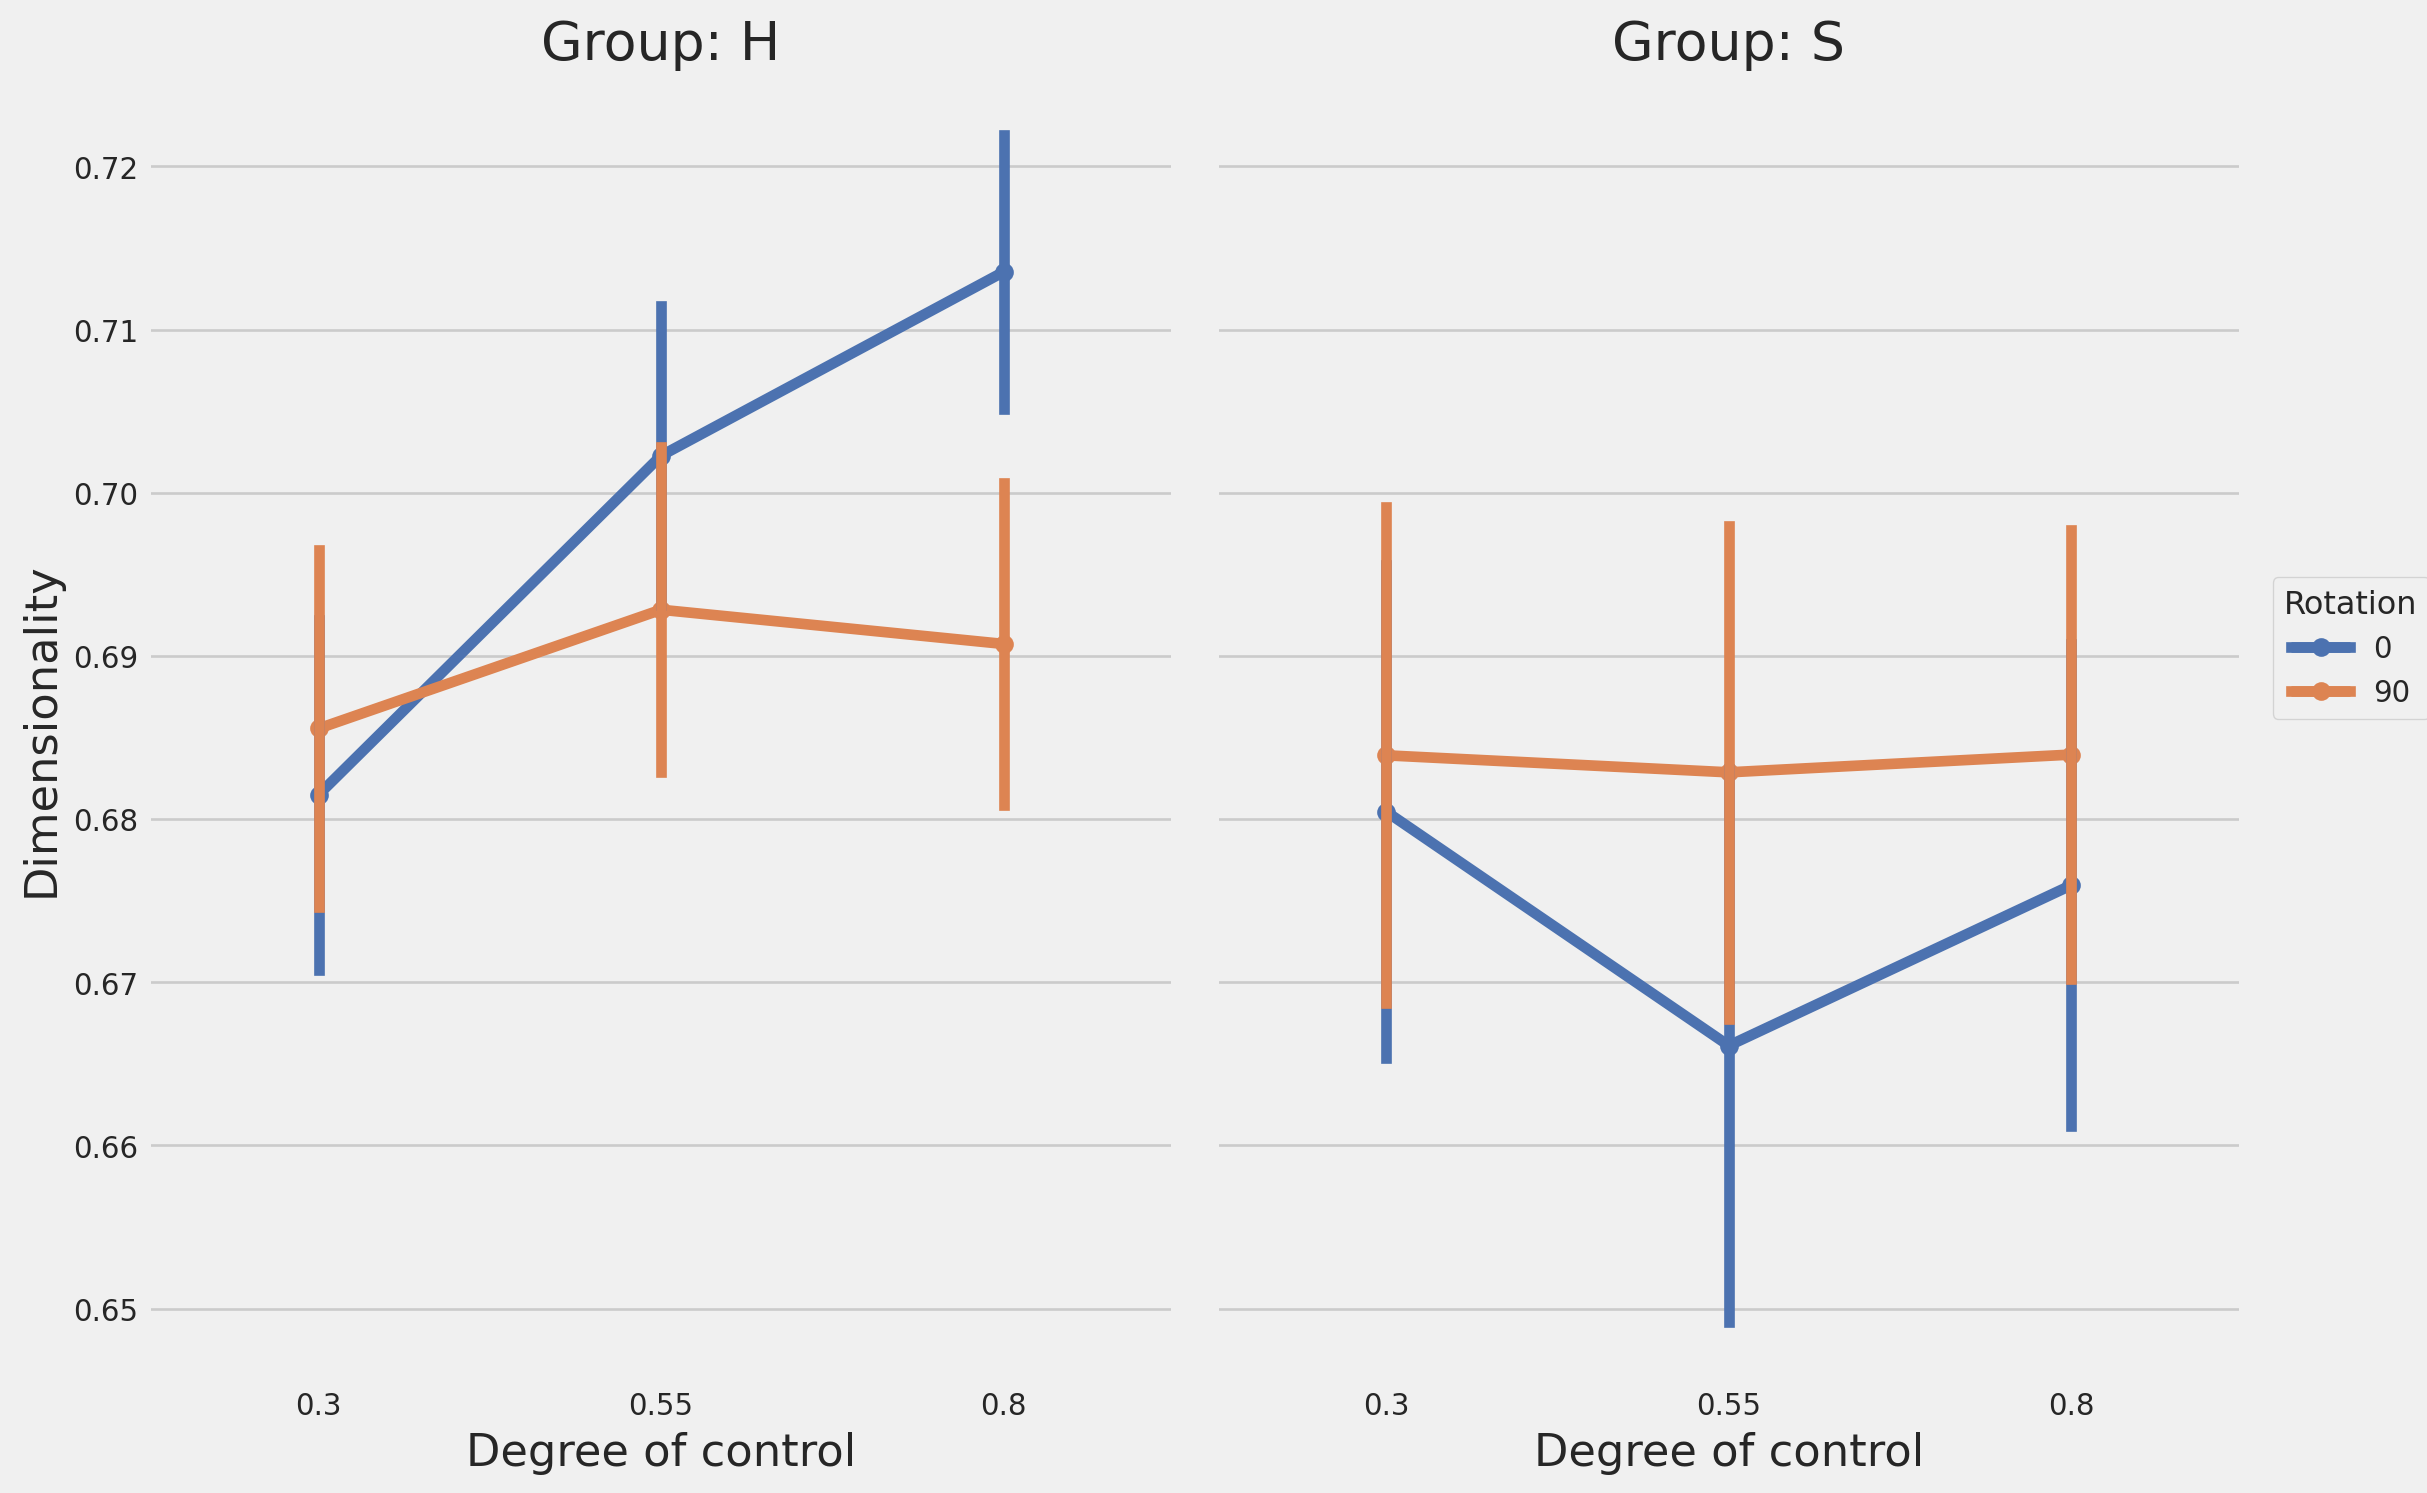

In [4]:

plt.style.use('default')
p = (
        so.Plot(df_all_group, x="actual_control", y="dim", color="angular_bias")
        .facet("group")
        .add(so.Line(marker="o"), so.Agg())
        .theme({**style.library['fivethirtyeight']})
        .scale(color="deep")
        .add(so.Range(), so.Est(errorbar="se"))
        .layout(size=(12, 8))
        .label(x="Degree of control", y="Dimensionality", col="Group:", color="Rotation")
        
    )
# sns.set_style("whitegrid")
p

In [18]:
filepaths = utils.Save.savepath(savepath, 'dimentionality.pdf')
p.save(filepaths)

AttributeError: 'FacetGrid' object has no attribute 'save'